In [1]:
import pandas as pd
import scanpy as sc
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
names_df = pd.read_csv("./sc.gene_program.names.csv", index_col=0)
program_dict = {
    '1': names_df['gene'][565:][20:][:-71][:115].tolist(),
    '2': names_df['gene'][565:][20:][:-71][115:176].tolist(),
    '3': names_df['gene'][565:][20:][:-71][176:219].tolist(),
    '4': names_df['gene'][565:][20:][:-71][219:244].tolist(),
    # '5': names_df['gene'][565:][20:][:-71][244:265].tolist(),
    '5': names_df['gene'][565:][20:][:-71][265:].tolist()
}

scdata = sc.read_h5ad('./RNA/sc.reclustered.h5')

In [3]:
score_df = pd.concat([pd.DataFrame(scdata[:, program_dict['1'] + program_dict['2'] + program_dict['3'] + program_dict['4'] + program_dict['5']].X.toarray(),
                                   index=scdata.obs_names,
                                   columns=program_dict['1'] + program_dict['2'] + program_dict['3'] + program_dict['4'] + program_dict['5']),
                                   scdata.obs['perturb_gene']], axis=1)
score_df = score_df[score_df['perturb_gene'] != 'Duplicate'].groupby('perturb_gene', as_index=False).mean().dropna().set_index('perturb_gene')
# print(score_df[program_dict['5']])
score_df = score_df.div(score_df.loc['sgNon-targeting', :], axis=1)
score_df.dropna(axis=1, inplace=True)

# Calculate program scores only for genes that exist in the data
for i in range(5):
    program_genes = [gene for gene in program_dict[str(i+1)] if gene in score_df.columns]
    if program_genes:
        score_df[f'Program {i+1}'] = score_df[program_genes].mean(axis=1)
        
score_df = score_df.drop(columns=[col for col in score_df.columns if col in program_dict['1'] + program_dict['2'] + program_dict['3'] + program_dict['4'] + program_dict['5']])
score_df = score_df.loc[score_df.index != 'sgNon-targeting']

/tmp/ipykernel_317108/446677686.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  score_df = score_df[score_df['perturb_gene'] != 'Duplicate'].groupby('perturb_gene', as_index=False).mean().dropna().set_index('perturb_gene')


In [4]:
chemokine_list = ["sgCcr1", "sgCcr2", "sgCcr4", "sgCcr5", "sgCcr6",
    "sgCcr7", "sgCcr10", "sgCxcr1", "sgCxcr2", "sgCxcr3", "sgCxcr4",
    "sgAckr3", "sgCxcr5", "sgCxcr6", "sgCd74", "sgGpr35"]
chemo_df = score_df.loc[chemokine_list]
tf_df = score_df.loc[~score_df.index.isin(chemokine_list)]
tf_df

,Program 1,Program 2,Program 3,Program 4,Program 5
perturb_gene,,,,,
sgBatf,0.575785,0.499629,0.345029,0.000000,1.418800
sgBcl2,1.137697,0.529931,0.898444,0.000000,1.042679
sgBcl2l11,1.041156,0.526794,0.768607,0.792170,0.843495
sgBhlhe40,0.892751,0.000000,1.099909,0.798836,1.196275
sgDdit4,0.803005,0.113218,1.208919,0.171074,1.151014
sgElob,1.777224,0.000000,1.591424,0.859475,0.928474
sgFos,0.955755,0.000000,1.080231,0.915156,1.162812
sgFoxp1,0.766097,0.000000,0.746143,0.470289,1.136825
sgHopx,1.021808,0.000000,0.896053,0.525366,1.036669


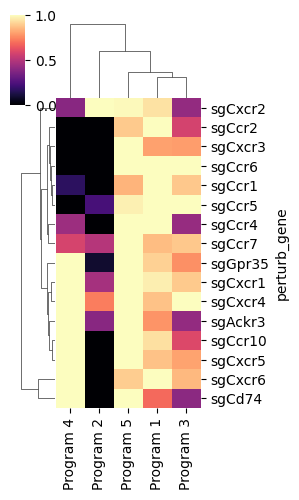

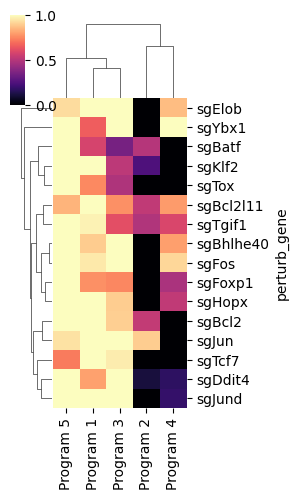

In [5]:
sns.clustermap(chemo_df, cmap='magma', vmax=1, vmin=0, figsize=(3, 5))
sns.clustermap(tf_df, cmap='magma', vmax=1, vmin=0, figsize=(3, 5))
plt.show()

{'icoord': [[5.0, 5.0, 15.0, 15.0],
  [45.0, 45.0, 55.0, 55.0],
  [35.0, 35.0, 50.0, 50.0],
  [25.0, 25.0, 42.5, 42.5],
  [75.0, 75.0, 85.0, 85.0],
  [65.0, 65.0, 80.0, 80.0],
  [33.75, 33.75, 72.5, 72.5],
  [125.0, 125.0, 135.0, 135.0],
  [115.0, 115.0, 130.0, 130.0],
  [105.0, 105.0, 122.5, 122.5],
  [145.0, 145.0, 155.0, 155.0],
  [113.75, 113.75, 150.0, 150.0],
  [95.0, 95.0, 131.875, 131.875],
  [53.125, 53.125, 113.4375, 113.4375],
  [10.0, 10.0, 83.28125, 83.28125]],
 'dcoord': [[0.0, 1.656987223774576, 1.656987223774576, 0.0],
  [0.0, 0.3151878667694947, 0.3151878667694947, 0.0],
  [0.0, 0.6822370827916191, 0.6822370827916191, 0.3151878667694947],
  [0.0, 0.8359913175129595, 0.8359913175129595, 0.6822370827916191],
  [0.0, 0.38857302121690274, 0.38857302121690274, 0.0],
  [0.0, 0.895344054346917, 0.895344054346917, 0.38857302121690274],
  [0.8359913175129595,
   1.2177170024968749,
   1.2177170024968749,
   0.895344054346917],
  [0.0, 0.33323306367899264, 0.33323306367899264, 0

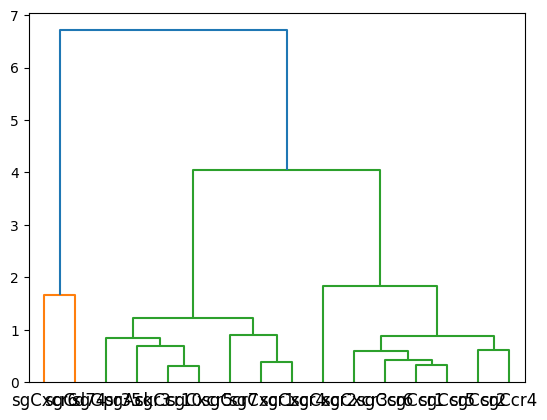

In [17]:
sch.dendrogram(chem_linkage, labels=chemo_df.index)

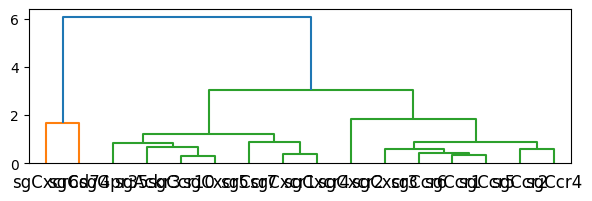

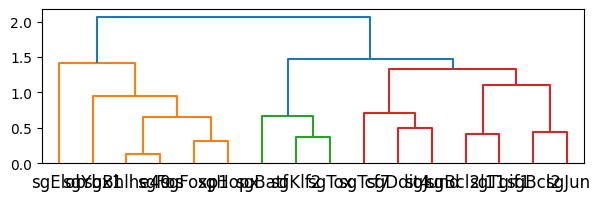

In [6]:
import scipy.cluster.hierarchy as sch
plt.figure(figsize=(7, 2))
chem_linkage = sch.linkage(chemo_df.values, method='ward')
sch.dendrogram(chem_linkage, labels=chemo_df.index)

plt.figure(figsize=(7, 2))
tf_linkage = sch.linkage(tf_df.values, method='ward')
sch.dendrogram(tf_linkage, labels=tf_df.index)
plt.show()

/tmp/ipykernel_317108/1870806734.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tf_df['Module'] = modules


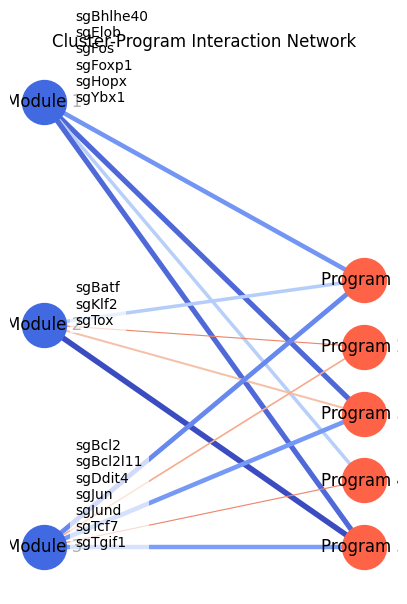

In [7]:
from scipy.cluster.hierarchy import fcluster
import networkx as nx

modules = fcluster(tf_linkage, 3, criterion='maxclust')

tf_df['Module'] = modules

module_means = tf_df.groupby('Module').mean()

module_guides = {}
for module in tf_df['Module'].unique():
    guides = tf_df[tf_df['Module'] == module].index.tolist()
    module_guides[module] = '\n'.join(guides)

melted_df = module_means.reset_index().melt(id_vars=['Module'], 
                                           var_name='Program',
                                           value_name='Score')
melted_df['Score'] = (melted_df['Score'] - melted_df['Score'].min()) / (melted_df['Score'].max() - melted_df['Score'].min())

plt.figure(figsize=(5, 7))
G = nx.Graph()

for module in melted_df['Module'].unique():
    G.add_node(f'Module {module}', node_type='module')
for program in melted_df['Program'].unique():
    G.add_node(program, node_type='program')

for _, row in melted_df.iterrows():
    if abs(row['Score']) > 0.01:
        G.add_edge(f'Module {row["Module"]}', 
                  row['Program'], 
                  weight=abs(row['Score']) * 2)

pos = {}
programs = [n for n,attr in G.nodes(data=True) if attr['node_type']=='program']
modules = [n for n,attr in G.nodes(data=True) if attr['node_type']=='module']

for i, program in enumerate(programs):
    pos[program] = (1, 0.2 - 0.6 * (i * 2/(len(programs)-1)))

for i, module in enumerate(modules):
    pos[module] = (-1, 1 - (i * 2/(len(modules)-1)))

nx.draw_networkx_nodes(G, pos,
                      nodelist=[n for n,attr in G.nodes(data=True) if attr['node_type']=='module'],
                      node_color='royalblue',
                      node_size=1000)
nx.draw_networkx_nodes(G, pos,
                      nodelist=[n for n,attr in G.nodes(data=True) if attr['node_type']=='program'],
                      node_color='tomato',
                      node_size=1000)

edges = G.edges()
weights = [G[u][v]['weight'] for u,v in edges]
edge_colors = plt.cm.coolwarm_r(np.array(weights) / max(weights))

edges = G.edges()
weights = [G[u][v]['weight'] * 2 for u,v in edges]
nx.draw_networkx_edges(G, pos, width=weights, edge_color=edge_colors)

nx.draw_networkx_labels(G, pos)

for module, guides in module_guides.items():
    module_pos = pos[f'Module {module}']
    plt.annotate(guides,
                xy=(module_pos[0], module_pos[1]),
                xytext=(module_pos[0] + 0.2, module_pos[1]),
                bbox=dict(facecolor='white', edgecolor='none', alpha=0.7))

plt.title('Cluster-Program Interaction Network')
plt.axis('off')

plt.rcParams['pdf.fonttype'] = 42
plt.savefig('./plots/tf_module_program_network.pdf', dpi=300, format='pdf', bbox_inches='tight')
plt.show()


# TF ~ Chemokine network

In [8]:
from scipy.cluster.hierarchy import fcluster
modules = fcluster(tf_linkage, 3, criterion='maxclust')
tf_df['Module'] = modules

modules = fcluster(chem_linkage, 3, criterion='maxclust')
chemo_df['Module'] = modules

print(tf_df)
print(chemo_df)

              Program 1  Program 2  Program 3  Program 4  Program 5  Module
perturb_gene                                                               
sgBatf         0.575785   0.499629   0.345029   0.000000   1.418800       2
sgBcl2         1.137697   0.529931   0.898444   0.000000   1.042679       3
sgBcl2l11      1.041156   0.526794   0.768607   0.792170   0.843495       3
sgBhlhe40      0.892751   0.000000   1.099909   0.798836   1.196275       1
sgDdit4        0.803005   0.113218   1.208919   0.171074   1.151014       3
sgElob         1.777224   0.000000   1.591424   0.859475   0.928474       1
sgFos          0.955755   0.000000   1.080231   0.915156   1.162812       1
sgFoxp1        0.766097   0.000000   0.746143   0.470289   1.136825       1
sgHopx         1.021808   0.000000   0.896053   0.525366   1.036669       1
sgJun          1.013571   0.895826   1.093604   0.000000   0.940995       3
sgJund         1.183190   0.000000   1.473159   0.187042   1.024077       3
sgKlf2      

/tmp/ipykernel_317108/2832754383.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tf_df['Module'] = modules


In [9]:
chemo_gene = set(chemo_df.index.str.lstrip('sg'))
chemo_gene = [gene for gene in chemo_gene if gene in scdata.var_names]

tf_gene = set(tf_df.index.str.lstrip('sg'))
tf_gene = [gene for gene in tf_gene if gene in scdata.var_names]

chemo_tf_regdf = pd.concat([pd.DataFrame(scdata[:, chemo_gene].X.toarray(), index=scdata.obs_names, columns=chemo_gene),
                           scdata.obs['perturb_gene']], axis=1)
chemo_tf_regdf = chemo_tf_regdf[chemo_tf_regdf['perturb_gene'] != 'Duplicate'].groupby('perturb_gene', as_index=False).mean().dropna().set_index('perturb_gene')

tf_chemo_regdf = pd.concat([pd.DataFrame(scdata[:, tf_gene].X.toarray(), index=scdata.obs_names, columns=tf_gene),
                           scdata.obs['perturb_gene']], axis=1)
tf_chemo_regdf = tf_chemo_regdf[tf_chemo_regdf['perturb_gene'] != 'Duplicate'].groupby('perturb_gene', as_index=False).mean().dropna().set_index('perturb_gene')

for i in range(3):
    module_genes = tf_df.groupby('Module').get_group(i+1).index.str.lstrip('sg').tolist()
    module_genes = [gene for gene in module_genes if gene in tf_chemo_regdf.columns]
    tf_chemo_regdf[f'TF Module {i+1}'] = tf_chemo_regdf[module_genes].mean(axis=1)
tf_chemo_regdf = tf_chemo_regdf.drop(columns=[col for col in tf_chemo_regdf.columns if col in tf_gene])
for i in range(3):
    module_genes = chemo_df.groupby('Module').get_group(i+1).index.str.lstrip('sg').tolist()
    module_genes = [gene for gene in module_genes if gene in chemo_tf_regdf.columns]
    chemo_tf_regdf[f'Chemokine Module {i+1}'] = chemo_tf_regdf[module_genes].mean(axis=1)
chemo_tf_regdf = chemo_tf_regdf.drop(columns=[col for col in chemo_tf_regdf.columns if col in chemo_gene])

tf_chemo_regdf = tf_chemo_regdf.div(tf_chemo_regdf.loc['sgNon-targeting'], axis=1)
chemo_tf_regdf = chemo_tf_regdf.div(chemo_tf_regdf.loc['sgNon-targeting'], axis=1)

chemo_modules = chemo_df['Module'].to_dict()
tf_modules = tf_df['Module'].to_dict()
chemo_tf_regdf = pd.DataFrame({
    'TF Module 1': chemo_tf_regdf.loc[[k for k,v in tf_modules.items() if v==1], ].mean().tolist(),
    'TF Module 2': chemo_tf_regdf.loc[[k for k,v in tf_modules.items() if v==2], ].mean().tolist(), 
    'TF Module 3': chemo_tf_regdf.loc[[k for k,v in tf_modules.items() if v==3], ].mean().tolist()
}, index=['Chemokine Module 1', 'Chemokine Module 2', 'Chemokine Module 3'])

tf_chemo_regdf = pd.DataFrame({
    'Chemokine Module 1': tf_chemo_regdf.loc[[k for k,v in chemo_modules.items() if v==1], ].mean().tolist(),
    'Chemokine Module 2': tf_chemo_regdf.loc[[k for k,v in chemo_modules.items() if v==2], ].mean().tolist(),
    'Chemokine Module 3': tf_chemo_regdf.loc[[k for k,v in chemo_modules.items() if v==3], ].mean().tolist()
}, index=['TF Module 1', 'TF Module 2', 'TF Module 3'])


tf_chemo_regdf = tf_chemo_regdf.melt(ignore_index=False).reset_index()
chemo_tf_regdf = chemo_tf_regdf.melt(ignore_index=False).reset_index()

tf_chemo_regdf.columns = ['Expression', 'Perturbation', 'Score']
chemo_tf_regdf.columns = ['Expression', 'Perturbation', 'Score']

/tmp/ipykernel_317108/1705367281.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  chemo_tf_regdf = chemo_tf_regdf[chemo_tf_regdf['perturb_gene'] != 'Duplicate'].groupby('perturb_gene', as_index=False).mean().dropna().set_index('perturb_gene')
/tmp/ipykernel_317108/1705367281.py:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tf_chemo_regdf = tf_chemo_regdf[tf_chemo_regdf['perturb_gene'] != 'Duplicate'].groupby('perturb_gene', as_index=False).mean().dropna().set_index('perturb_gene')


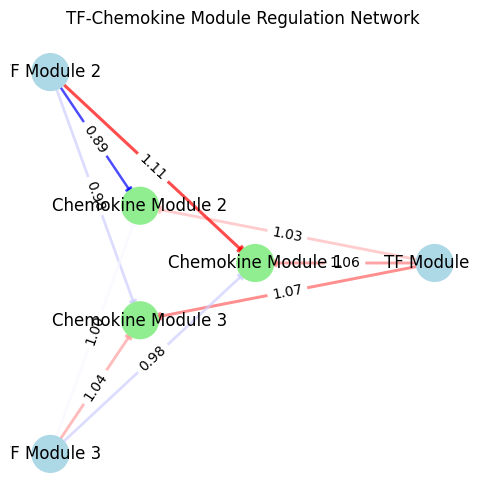

In [10]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

# 创建有向图
G = nx.DiGraph()

# 添加节点
tf_modules = tf_chemo_regdf['Expression'].unique()
chemo_modules = tf_chemo_regdf['Perturbation'].unique()

# 添加TF模块节点和Chemokine模块节点
for tf in tf_modules:
    G.add_node(tf, node_type='TF')
for chemo in chemo_modules:
    G.add_node(chemo, node_type='Chemokine')

# 添加边和权重
for _, row in tf_chemo_regdf.iterrows():
    G.add_edge(row['Expression'], row['Perturbation'], weight=row['Score'])

# 设置节点位置
# Chemokine模块位于等边三角形内部
r = 0.3  # 内圈半径
angles = np.linspace(0, 2*np.pi, len(chemo_modules), endpoint=False)
pos = {}
for i, chemo in enumerate(chemo_modules):
    pos[chemo] = (r * np.cos(angles[i]), r * np.sin(angles[i]))

# TF模块位于外部
R = 1.0  # 外圈半径
angles = np.linspace(0, 2*np.pi, len(tf_modules), endpoint=False)
for i, tf in enumerate(tf_modules):
    pos[tf] = (R * np.cos(angles[i]), R * np.sin(angles[i]))

# 绘图设置
plt.figure(figsize=(6, 6))

# 绘制节点
nx.draw_networkx_nodes(G, pos, 
                      node_color=['lightblue' if G.nodes[node]['node_type']=='TF' else 'lightgreen' for node in G.nodes],
                      node_size=700)

# 绘制边
edges = G.edges()
weights = [G[u][v]['weight'] for u,v in edges]
# 根据权重设置颜色
min_weight = min(weights)
max_weight = max(weights)
colors = [(w-min_weight)/(max_weight-min_weight) for w in weights]
edge_colors = plt.cm.bwr(colors)

nx.draw_networkx_edges(G, pos, width=[w*2 for w in weights], 
                      edge_color=edge_colors, alpha=0.7)

# 添加标签
nx.draw_networkx_labels(G, pos)

# 添加边的权重标签
edge_labels = nx.get_edge_attributes(G, 'weight')
edge_labels = {k: f'{v:.2f}' for k,v in edge_labels.items()}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

plt.title('TF-Chemokine Module Regulation Network')
plt.axis('off')

plt.rcParams['pdf.fonttype'] = 42
plt.savefig('./plots/tf_chemokine_module_network.pdf', dpi=300, format='pdf', bbox_inches='tight')
plt.show()


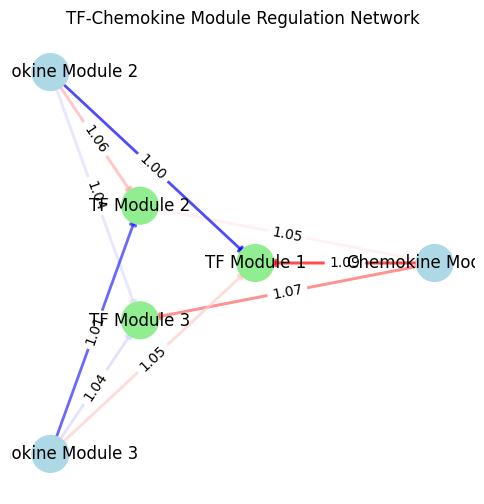

In [14]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

# 创建有向图
G = nx.DiGraph()

# 添加节点
tf_modules = chemo_tf_regdf['Expression'].unique()
chemo_modules = chemo_tf_regdf['Perturbation'].unique()

# 添加TF模块节点和Chemokine模块节点
for tf in tf_modules:
    G.add_node(tf, node_type='TF')
for chemo in chemo_modules:
    G.add_node(chemo, node_type='Chemokine')

# 添加边和权重
for _, row in chemo_tf_regdf.iterrows():
    G.add_edge(row['Expression'], row['Perturbation'], weight=row['Score'])

# 设置节点位置
# Chemokine模块位于等边三角形内部
r = 0.3  # 内圈半径
angles = np.linspace(0, 2*np.pi, len(chemo_modules), endpoint=False)
pos = {}
for i, chemo in enumerate(chemo_modules):
    pos[chemo] = (r * np.cos(angles[i]), r * np.sin(angles[i]))

# TF模块位于外部
R = 1.0  # 外圈半径
angles = np.linspace(0, 2*np.pi, len(tf_modules), endpoint=False)
for i, tf in enumerate(tf_modules):
    pos[tf] = (R * np.cos(angles[i]), R * np.sin(angles[i]))

# 绘图设置
plt.figure(figsize=(6, 6))

# 绘制节点
nx.draw_networkx_nodes(G, pos, 
                      node_color=['lightblue' if G.nodes[node]['node_type']=='TF' else 'lightgreen' for node in G.nodes],
                      node_size=700)

# 绘制边
edges = G.edges()
weights = [G[u][v]['weight'] for u,v in edges]
# 根据权重设置颜色
min_weight = min(weights)
max_weight = max(weights)
colors = [(w-min_weight)/(max_weight-min_weight) for w in weights]
edge_colors = plt.cm.bwr(colors)

nx.draw_networkx_edges(G, pos, width=[w*2 for w in weights], 
                      edge_color=edge_colors, alpha=0.7)

# 添加标签
nx.draw_networkx_labels(G, pos)

# 添加边的权重标签
edge_labels = nx.get_edge_attributes(G, 'weight')
edge_labels = {k: f'{v:.2f}' for k,v in edge_labels.items()}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

plt.title('TF-Chemokine Module Regulation Network')
plt.axis('off')

plt.rcParams['pdf.fonttype'] = 42
plt.savefig('./plots/chemokine_tf_module_network.pdf', dpi=300, format='pdf', bbox_inches='tight')
plt.show()
